# Bitcoin 2025 Data Analysis 

## Importing Libraries

In [33]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="darkgrid")

## Data Fetching

In [28]:
print("Fetching BTC/USDT data from Binance exchange...")
exchange = ccxt.binance()

ohlcv = exchange.fetch_ohlcv(
    'BTC/USDT', 
    timeframe='1d', 
    since=exchange.parse8601('2025-01-01T00:00:00Z')
)

btc_df = pd.DataFrame(ohlcv, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
btc_df['timestamp'] = pd.to_datetime(btc_df['timestamp'], unit='ms')
btc_df.set_index('timestamp', inplace=True)

print(f"Data shape: {btc_df.shape}")
btc_df.head()

Fetching BTC/USDT data from Binance exchange...
Data shape: (180, 5)


,open,high,low,close,volume
timestamp,,,,,
2025-01-01,93576.00,95151.15,92888.00,94591.79,10373.32613
2025-01-02,94591.78,97839.50,94392.00,96984.79,21970.48948
2025-01-03,96984.79,98976.91,96100.01,98174.18,15253.82936
2025-01-04,98174.17,98778.43,97514.79,98220.50,8990.05651
2025-01-05,98220.51,98836.85,97276.79,98363.61,8095.63723


## Feature Engineering 

In [35]:
btc_df["Daily_Return"] = btc_df["close"].pct_change()
btc_df["MA_10"] = btc_df["close"].rolling(10).mean()
btc_df["MA_30"] = btc_df["close"].rolling(30).mean()
btc_df["Volatility"] = btc_df["close"].rolling(10).std()

# Generator-based risk labeling
def risk_label(df):
    for ret in df["Daily_Return"].fillna(0):
        if ret <= -0.05:
            yield "High Risk"
        elif ret <= -0.02:
            yield "Medium Risk"
        else:
            yield "Low Risk"

btc_df["Risk"] = list(risk_label(btc_df))

## Summary Statistics

In [37]:
summary = {
    "avg_return": btc_df["Daily_Return"].mean(),
    "volatility": btc_df["Daily_Return"].std(),
    "max_drawdown": btc_df["close"].pct_change().min(),
    "best_day": btc_df["Daily_Return"].idxmax(),
    "worst_day": btc_df["Daily_Return"].idxmin(),
    "high_risk_days": (btc_df["Risk"] == "High Risk").sum()
}

print("\n📋 Bitcoin Summary Report")
print(f"Average Daily Return: {summary['avg_return']:.2%}")
print(f"Volatility: {summary['volatility']:.2%}")
print(f"Maximum Drawdown (Single Day): {summary['max_drawdown']:.2%}")
print(f"Best Day: {summary['best_day'].date()}")
print(f"Worst Day: {summary['worst_day'].date()}")
print(f"High Risk Days: {summary['high_risk_days']}")



📋 Bitcoin Summary Report
Average Daily Return: 0.10%
Volatility: 2.46%
Maximum Drawdown (Single Day): -8.54%
Best Day: 2025-03-02
Worst Day: 2025-03-03
High Risk Days: 4


## Visualizing Data

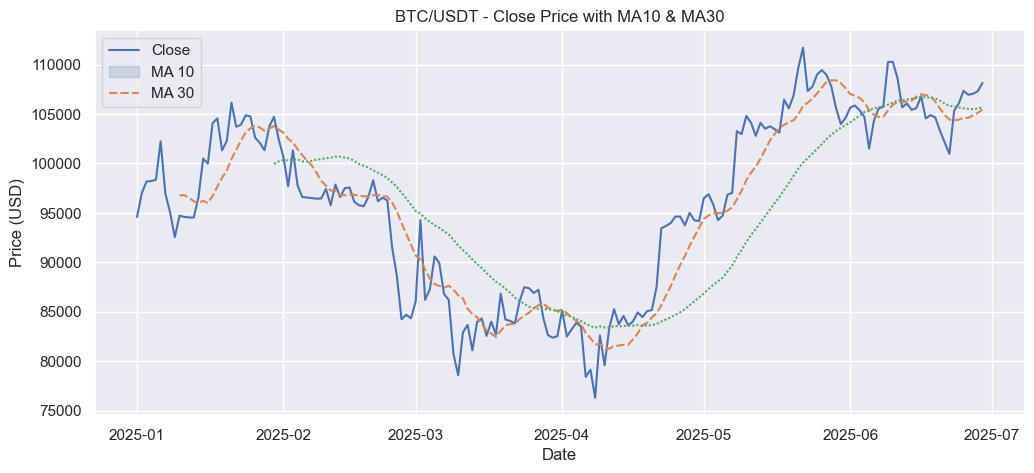

In [39]:
## overall overview
plt.figure(figsize=(12, 5))
sns.lineplot(data=btc_df[["close", "MA_10", "MA_30"]])
plt.title("BTC/USDT - Close Price with MA10 & MA30")
plt.ylabel("Price (USD)")
plt.xlabel("Date")
plt.legend(["Close", "MA 10", "MA 30"])
plt.show()

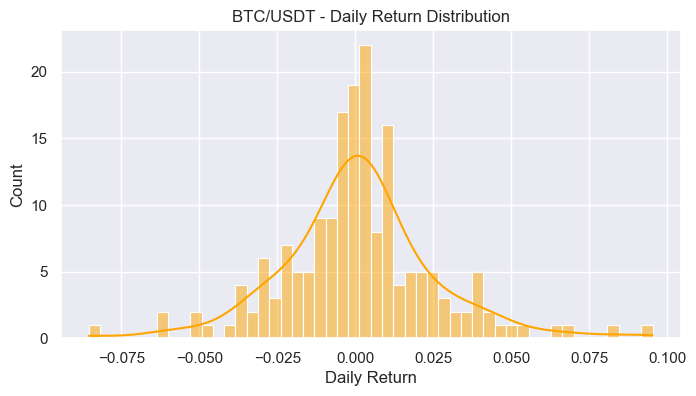

In [41]:
## Daily return distruibution
plt.figure(figsize=(8, 4))
sns.histplot(btc_df["Daily_Return"].dropna(), bins=50, kde=True, color="orange")
plt.title("BTC/USDT - Daily Return Distribution")
plt.xlabel("Daily Return")
plt.show()


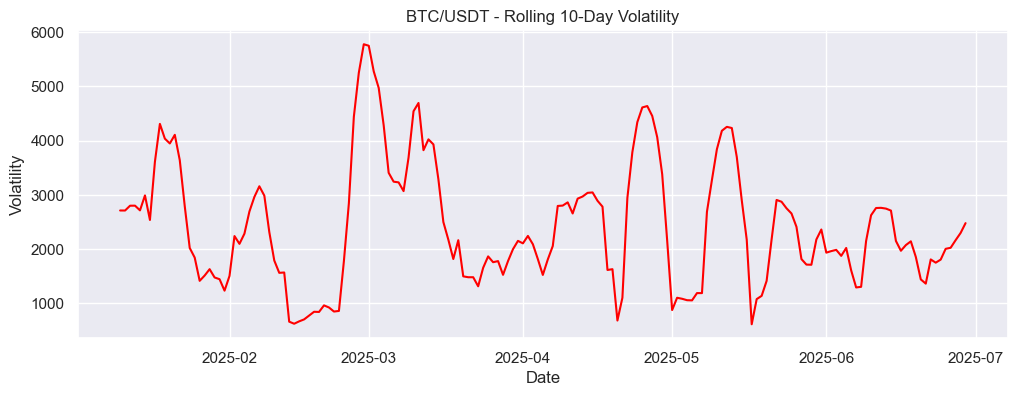

In [51]:
# volatility
plt.figure(figsize=(12, 4))
sns.lineplot(data=btc_df["Volatility"], color='red')
plt.title("BTC/USDT - Rolling 10-Day Volatility")
plt.ylabel("Volatility")
plt.xlabel("Date")
plt.show()

## Risk Analysis: High Risk day 

In [49]:
print("\n High Risk Days:")
it = iter(btc_df[btc_df["Risk"] == "High Risk"].iterrows())
while True:
    try:
        idx, row = next(it)
        print(f"{idx.date()} - Close: {row['close']:.2f} - Return: {row['Daily_Return']:.2%}")
    except StopIteration:
        break


 High Risk Days:
2025-01-07 - Close: 96954.61 - Return: -5.17%
2025-03-03 - Close: 86220.61 - Return: -8.54%
2025-03-09 - Close: 80734.37 - Return: -6.37%
2025-04-06 - Close: 78430.00 - Return: -6.11%


## Insights

In [47]:

print("\n Insights:")
print("1. Bitcoin showed expected volatility for 2025, with average daily returns of {:.2%} and a peak drop of {:.2%} on {}.".format(summary['avg_return'], summary['max_drawdown'], summary['worst_day'].date()))
print("2. The highest return occurred on {}, suggesting potential buying momentum.".format(summary['best_day'].date()))
print("3. High-risk days were identified using return thresholds; these help in flagging extreme market movements.")
print("4. The rolling volatility chart indicates clusters of uncertainty, which can inform timing strategies.")
print("5. MA10 vs MA30 crossover patterns help identify bullish/bearish momentum in Bitcoin. This adds predictive value for both short-term traders and long-term investors.")


 Insights:
1. Bitcoin showed expected volatility for 2025, with average daily returns of 0.10% and a peak drop of -8.54% on 2025-03-03.
2. The highest return occurred on 2025-03-02, suggesting potential buying momentum.
3. High-risk days were identified using return thresholds; these help in flagging extreme market movements.
4. The rolling volatility chart indicates clusters of uncertainty, which can inform timing strategies.
5. MA10 vs MA30 crossover patterns help identify bullish/bearish momentum in Bitcoin. This adds predictive value for both short-term traders and long-term investors.
